# 1.0 收集 Gather

In [284]:
import zipfile
import pandas as pd
import numpy as np
import re
import requests
import tweepy
import json

### Step 1: 将twitter-archive-enhanced.csv读入到twit_arch文件

In [185]:
twit_arch=pd.read_csv('twitter-archive-enhanced.csv')

### Step 2: 从URL下载image-predictions.tsv文件

In [186]:
import requests
import os

In [187]:
folder_name='tweet'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url='https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
response=requests.get(url)
response

<Response [200]>

In [188]:
with open(os.path.join(folder_name,url.split('/')[-1]),mode='wb') as file:
    file.write(response.content)

In [189]:
os.listdir(folder_name)

['image-predictions.tsv', '.ipynb_checkpoints']

### Step 3: 将image-predictions.tsv读入到imag_pred文件

In [190]:
imag_pred=pd.read_csv('image-predictions.tsv',sep='\t')

### Step 4 : 将tweet_json.txt 逐条读入pandas DataFrame, 包括tweet ID, retweet_count, favorite_count

In [191]:
import json
with open('tweet_json.txt') as tweet_f:
    tweet=[]
    for row in tweet_f:
        tweet.append(json.loads(row))

In [192]:
import pandas as pd
twee_json=pd.DataFrame(tweet,columns=['id','retweet_count','favorite_count'])

In [193]:
twee_json.id=twee_json.rename(columns={'id':'tweet_id'}, inplace=True)

In [194]:
twee_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8842,39492
1,892177421306343426,6480,33786
2,891815181378084864,4301,25445
3,891689557279858688,8925,42863
4,891327558926688256,9721,41016


In [195]:
# df_list=[]
# file=open('tweet_json.txt','r')
# for line in file.readlines():
#    dic=json.loads(line)
#    df_list.append(dic)
# twee_json=pd.DataFrame(df_list)

In [196]:
twit_arch

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [197]:
imag_pred.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [198]:
twee_json.head(10)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8842,39492
1,892177421306343426,6480,33786
2,891815181378084864,4301,25445
3,891689557279858688,8925,42863
4,891327558926688256,9721,41016
5,891087950875897856,3240,20548
6,890971913173991426,2142,12053
7,890729181411237888,19548,66596
8,890609185150312448,4403,28187
9,890240255349198849,7684,32467


# 2.0 评估 Assess

#### 质量问题

1. imag_pred中p1_conf的显示有6位小数，有超过6位小数的.
2. imag_pred文件中的p1,p2,p3列的狗狗类型首字母不是大写.
3. rating_denominator中的一列应为10，显示有其他数字。全部换为10.
4. 将source中的url删除.
5. 替换twit_arch文件text中的'&amp'为’&'.
6. 移除和retweeted有关的列.
7. 将timestamp的类型改为timestamp.
8. twit_arch中名字提取不准确，a, an, such不是名字，将其替换为None.

#### 清洁度问题

1. 将twit_arch文件中retweet一列为空的内容保留下来，其余的删除
2. 将狗狗地位的四列合并存入新的变量，并将原始列删除
3. 将twit_arch,imag_pred,twee_json三张表格合并为一张表格

In [199]:
twit_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [200]:
twit_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [201]:
twit_arch.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [202]:
twit_arch.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [203]:
twit_arch.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [204]:
twit_arch.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [205]:
imag_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [206]:
imag_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [207]:
twee_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id          2352 non-null int64
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [208]:
twee_json.describe()

,tweet_id,retweet_count,favorite_count
count,2.352000e+03,2352.000000,2352.000000
mean,7.425913e+17,3134.932398,8109.198980
std,6.846210e+16,5237.846296,11980.795669
min,6.660209e+17,0.000000,0.000000
25%,6.783949e+17,618.000000,1417.000000
50%,7.193536e+17,1456.500000,3596.500000
75%,7.991219e+17,3628.750000,10118.000000
max,8.924206e+17,79116.000000,132318.000000


# 3.0 清理 Clean

In [209]:
# 查看三个文件中重复的列
all_columns=pd.Series(list(twit_arch)+list(imag_pred)+list(twee_json))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

In [210]:
list(twit_arch)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [211]:
# 建立源文件的备份，在备份上进行数据清理
twit_arch_clean=twit_arch.copy()
imag_pred_clean=imag_pred.copy()
twee_json_clean=twee_json.copy()

先清理清洁度，即结构性问题

一。清洁度问题：

1. 将twit_arch,imag_pred,twee_json三张表格合并为一张表格

2. 将twit_arch文件中retweet一列为空的内容保留下来，其余的删除

3. 将狗狗地位的四列合并存入新的变量，并将原始列删除 

S1定义：将twit_arch,imag_pred,twee_json三张表格合并为一张表格

In [212]:
# 将twit_arch_clean中的tweet_id改为整数型
twit_arch_clean.tweet_id=twit_arch_clean.tweet_id.astype(int)

In [213]:
# 将twit_arch_clean和twee_json_clean拼接在一起存入twit_arch_clean
twit_arch_clean=pd.merge(twit_arch_clean,twee_json_clean,on="tweet_id",how="left")

In [214]:
# 将twit_arch_clean和imag_pred_clean拼接在一起，存入dogratep_clean
dogratep_clean=pd.merge(twit_arch_clean,imag_pred_clean,on="tweet_id",how="left")

S1测试

In [215]:
dogratep_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [216]:
dogratep_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
retweet_count                 23

S2定义：将twit_arch文件中不包括图片的列删除，同时只保留retweet一列为空的内容其余的删除

In [217]:
dogratep_clean=dogratep_clean[dogratep_clean.retweeted_status_id.isnull()]
dogratep_clean=dogratep_clean.drop_duplicates()
dogratep_clean=dogratep_clean.dropna(subset = ['jpg_url'])

S2测试

In [218]:
len(dogratep_clean)

1994

S3定义：将狗狗地位的四列合并存入新的变量，并将原始列删除

In [219]:
# 将狗狗地位中的doggo,floofer,pupper和puppo合并在一列，存入新的变量dog_status
dogratep_clean['dog_status']=dogratep_clean['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)

In [220]:
# 合并后将这四列删除doggo,floofer,pupper和puppo
dogratep_clean=dogratep_clean.drop('doggo',axis=1)
dogratep_clean=dogratep_clean.drop('floofer',axis=1)
dogratep_clean=dogratep_clean.drop('pupper',axis=1)
dogratep_clean=dogratep_clean.drop('puppo',axis=1)

S3测试

In [221]:
dogratep_clean.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_status
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,...,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,...,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,doggo


In [222]:
dogratep_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
retweet_count                 1994 non-null float64
favorite_count                1994 non-null float64
jpg_url                       1994 non-null object
img_num                       1994 non-null float64
p1                            1994 

In [223]:
twit_arch_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,8842.0,39492.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,6480.0,33786.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,4301.0,25445.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,8925.0,42863.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,9721.0,41016.0
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None,3240.0,20548.0
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,2142.0,12053.0
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None,19548.0,66596.0
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None,4403.0,28187.0
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,7684.0,32467.0


In [224]:
dogratep_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
retweet_count                 1994 non-null float64
favorite_count                1994 non-null float64
jpg_url                       1994 non-null object
img_num                       1994 non-null float64
p1                            1994 

#### 再处理质量问题

Q1定义：移除和retweeted有关的列

In [225]:
columns = ['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']
dogratep_clean = dogratep_clean.drop(columns, axis=1)

Q1测试

In [226]:
dogratep_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
retweet_count            1994 non-null float64
favorite_count           1994 non-null float64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf                  1994 non-null float64
p2_dog             

Q2定义：text中评分包括小数点，则在rating_numerator中截取的是小数点后的数字，应该截取小数点前的数字

In [227]:
dogratep_clean[dogratep_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_status
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,...,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True,NaN
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,...,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True,NaN
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,...,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True,NaN
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10,None,...,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True,pupper


In [228]:
# 改变numerator和denominator的类型
dogratep_clean['rating_numerator'] = dogratep_clean['rating_numerator'].astype('float')
dogratep_clean['rating_denominator'] = dogratep_clean['rating_denominator'].astype('float')

In [229]:
dogratep_clean.loc[(dogratep_clean['tweet_id'] == 883482846933004288) & (dogratep_clean['rating_numerator'] == 5), ['rating_numerator']] = 13.5
dogratep_clean.loc[(dogratep_clean['tweet_id'] == 786709082849828864) & (dogratep_clean['rating_numerator'] == 75), ['rating_numerator']] = 9.75
dogratep_clean.loc[(dogratep_clean['tweet_id'] == 778027034220126208) & (dogratep_clean['rating_numerator'] == 27), ['rating_numerator']] = 11.27
dogratep_clean.loc[(dogratep_clean['tweet_id'] == 680494726643068929) & (dogratep_clean['rating_numerator'] == 26), ['rating_numerator']] = 11.26

Q2测试

In [230]:
dogratep_clean[dogratep_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_status
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.50,10.0,Bella,...,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True,NaN
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,10.0,Logan,...,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True,NaN
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11.27,10.0,Sophie,...,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True,NaN
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,11.26,10.0,None,...,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True,pupper


Q3定义：在text中出现两种评分xx/xx，选择分母为10的。

In [231]:
dogratep_clean[dogratep_clean.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_status
766,777684233540206592,NaN,NaN,2016-09-19 01:42:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Yep... just as I suspected. You're not flossi...",https://twitter.com/dog_rates/status/777684233...,12.0,10.0,None,...,cocker_spaniel,0.253442,True,golden_retriever,0.162850,True,otterhound,0.110921,True,NaN
1007,747600769478692864,NaN,NaN,2016-06-28 01:21:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bookstore and Seaweed. Bookstore is ti...,https://twitter.com/dog_rates/status/747600769...,10.0,10.0,Bookstore,...,Chesapeake_Bay_retriever,0.804363,True,Weimaraner,0.054431,True,Labrador_retriever,0.043268,True,NaN
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9.0,11.0,None,...,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True,NaN
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,4.0,20.0,None,...,Great_Dane,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True,NaN
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50.0,50.0,Bluebert,...,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True,NaN
1222,714258258790387713,NaN,NaN,2016-03-28 01:10:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Travis and Flurp. Travis is pretty chill ...,https://twitter.com/dog_rates/status/714258258...,10.0,10.0,Travis,...,collie,0.176758,True,Chesapeake_Bay_retriever,0.101834,True,beagle,0.101294,True,NaN
1359,703356393781329922,NaN,NaN,2016-02-26 23:10:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Socks. That water pup w the super legs...,https://twitter.com/dog_rates/status/703356393...,9.0,10.0,Socks,...,Border_collie,0.894842,True,collie,0.097364,True,English_springer,0.003037,True,NaN
1459,695064344191721472,NaN,NaN,2016-02-04 02:00:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This may be the greatest video I've ever been ...,https://twitter.com/dog_rates/status/695064344...,4.0,10.0,None,...,seat_belt,0.522211,False,sunglasses,0.077552,False,ice_lolly,0.051774,False,NaN
1465,694352839993344000,NaN,NaN,2016-02-02 02:53:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Oliviér. He takes killer selfies. Has a d...,https://twitter.com/dog_rates/status/694352839...,10.0,10.0,Oliviér,...,Australian_terrier,0.407886,True,Yorkshire_terrier,0.328173,True,silky_terrier,0.108404,True,NaN
1508,691483041324204033,NaN,NaN,2016-01-25 04:49:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When bae says they can't go out but you see th...,https://twitter.com/dog_rates/status/691483041...,5.0,10.0,None,...,bloodhound,0.886232,True,black-and-tan_coonhound,0.077420,True,Gordon_setter,0.009826,True,NaN


In [232]:
# 将需要更改numerator和denominator保存。
ratings_to_fix = ['After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ', 
 'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a', 
 'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq', 
 'This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5',
 'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv']

In [233]:
for entry in ratings_to_fix:
    mask = dogratep_clean.text == entry
    column_name1 = 'rating_numerator'
    column_name2 = 'rating_denominator'
    dogratep_clean.loc[mask, column_name1] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", entry)
    dogratep_clean.loc[mask, column_name2] = 10

Q3测试

In [234]:
dogratep_clean[dogratep_clean.text.isin(ratings_to_fix)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_status
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,14,10.0,None,...,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True,NaN
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,13,10.0,None,...,Great_Dane,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True,NaN
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,11,10.0,Bluebert,...,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True,NaN
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,10,10.0,Darrel,...,dingo,0.278600,False,Chihuahua,0.155207,True,loupe,0.153598,False,NaN
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,9,10.0,an,...,Maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True,NaN


In [235]:
dogratep_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null object
rating_denominator       1994 non-null float64
name                     1994 non-null object
retweet_count            1994 non-null float64
favorite_count           1994 non-null float64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf                  1994 non-null float64
p2_dog          

#### Q4定义：rating_denominator中的一列应为10，显示有其他数字。全部换为10

In [236]:
dogratep_clean['rating_denominator_10']='10'

In [237]:
dogratep_clean = dogratep_clean.drop('rating_denominator',axis=1)

In [238]:
dogratep_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null object
name                     1994 non-null object
retweet_count            1994 non-null float64
favorite_count           1994 non-null float64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf                  1994 non-null float64
p2_dog                   1994 non-null object
p3               

Q4测试

In [239]:
dogratep_clean.rating_denominator_10.value_counts()

10    1994
Name: rating_denominator_10, dtype: int64

Q5定义: 将source中的url删除,便于阅读

In [298]:
dogratep_clean['source'] = dogratep_clean['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
dogratep_clean['source'] = dogratep_clean['source'].str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Make a Scene')
dogratep_clean['source'] = dogratep_clean['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
dogratep_clean['source'] = dogratep_clean['source'].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

Q5测试

In [299]:
dogratep_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,retweet_count,favorite_count,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_status,rating_denominator_10,dog_name
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,8842.0,39492.0,...,False,bagel,0.085851,False,banana,0.076110,False,NaN,10,Phineas
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,6480.0,33786.0,...,True,Pekinese,0.090646,True,papillon,0.068957,True,NaN,10,Tilly
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,4301.0,25445.0,...,True,malamute,0.078253,True,kelpie,0.031379,True,NaN,10,Archie
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,8925.0,42863.0,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN,10,Darla
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,9721.0,41016.0,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN,10,Franklin
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,3240.0,20548.0,...,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,NaN,10,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,2142.0,12053.0,...,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,NaN,10,Jax
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,19548.0,66596.0,...,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,NaN,10,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,4403.0,28187.0,...,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,NaN,10,Zoey
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,7684.0,32467.0,...,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,doggo,10,Cassie


Q6定义：替换twit_arch文件text中的'&amp'为'&'

In [242]:
dogratep_clean['text']=dogratep_clean['text'].str.replace('&amp;','&')

Q6测试

In [243]:
dogratep_clean[dogratep_clean.text.str.contains('&amp;')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,name,retweet_count,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_status,rating_denominator_10


In [306]:
dogratep_clean.source.value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

Q7定义：将timestamp的类型改为timestamp

In [244]:
dogratep_clean['timestamp'] = pd.to_datetime(dogratep_clean['timestamp'])

Q7测试

In [245]:
dogratep_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null object
name                     1994 non-null object
retweet_count            1994 non-null float64
favorite_count           1994 non-null float64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf                  1994 non-null float64
p2_dog                   1994 non-null object
p3       

Q8定义：name截取不准确 & a,an,the等小写字母打头的不是名字

In [246]:
# 通过正则表达式从text截取name, 名字往往跟在text中"This is","Meet","Say hello to "等字段之后。
dog_names = []

for text in dogratep_clean['text']:
    if text.startswith('This is ') and re.match(r'[A-Z].*', text.split()[2]):
        dog_names.append(text.split()[2].strip(',').strip('.'))
    elif text.startswith('Meet ') and re.match(r'[A-Z].*', text.split()[1]):
        dog_names.append(text.split()[1].strip(',').strip('.'))
    elif text.startswith('Say hello to ') and re.match(r'[A-Z].*', text.split()[3]):
        dog_names.append(text.split()[3].strip(',').strip('.'))
    elif text.startswith('Here we have ') and re.match(r'[A-Z].*', text.split()[3]):
        dog_names.append(text.split()[3].strip(',').strip('.'))
    elif 'named' in text and re.match(r'[A-Z].*', text.split()[text.split().index('named') + 1]):
        dog_names.append(text.split()[text.split().index('named') + 1].strip(',').strip('.'))
    else:
        dog_names.append('NaN')

In [247]:
len(dog_names)

1994

In [248]:
#将dog_names存入dogratep_clean数据集
dogratep_clean['dog_name'] = dog_names

In [249]:
dogratep_clean.dog_name.value_counts()

NaN           625
Charlie        11
Oliver         10
Lucy           10
Cooper         10
Tucker          9
Penny           9
Sadie           8
Winston         8
Lola            7
Daisy           7
Bo              6
Stanley         6
Toby            6
Koda            6
Jax             6
Bella           6
Scout           5
Leo             5
Milo            5
Oscar           5
Rusty           5
Louis           5
Buddy           5
Bailey          5
Chester         5
Scooter         4
Cassie          4
Reggie          4
Derek           4
             ... 
Puff            1
Wesley          1
Levi            1
Cedrick         1
Poppy           1
Bloo            1
Kramer          1
Vinscent        1
Barney          1
Rupert          1
Bloop           1
Mimosa          1
Mollie          1
Rover           1
Klint           1
Jaspers         1
Herschel        1
Antony          1
Kenzie          1
Eve             1
Chubbs          1
Chesney         1
Smiley          1
Julio           1
Bobby     

In [250]:
dogratep_clean.name.value_counts()

None            546
a                55
Charlie          11
Oliver           10
Lucy             10
Cooper           10
Penny             9
Tucker            9
Sadie             8
Winston           8
Daisy             7
Lola              7
the               7
Toby              7
an                6
Bella             6
Jax               6
Koda              6
Bo                6
Stanley           6
Leo               5
Oscar             5
Buddy             5
Dave              5
Bailey            5
Rusty             5
Louis             5
Milo              5
Scout             5
Chester           5
               ... 
Bayley            1
Amélie            1
Remy              1
Alexanderson      1
Rubio             1
Dale              1
Harnold           1
Stephan           1
Sid               1
Beemo             1
Willem            1
Howie             1
Taco              1
Godzilla          1
Timison           1
Vinnie            1
Fred              1
Maya              1
Andru             1


In [251]:
# 将name这一列丢掉
dogratep_clean = dogratep_clean.drop(['name'], 1)

Q8测试

In [252]:
list(dogratep_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'retweet_count',
 'favorite_count',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'dog_status',
 'rating_denominator_10',
 'dog_name']

Q9定义: p1_conf,p2_conf,p3_conf的小数点位数显示不一致。全部转成6为小数显示

In [253]:
dogratep_clean.p1_conf=dogratep_clean.p1_conf.round(6)
dogratep_clean.p2_conf=dogratep_clean.p2_conf.round(6)
dogratep_clean.p3_conf=dogratep_clean.p3_conf.round(6)

Q9测试

In [254]:
dogratep_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,retweet_count,favorite_count,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_status,rating_denominator_10,dog_name
2101,670691627984359425,NaN,NaN,2015-11-28 19:51:59,Twitter for iPhone,This is Ester. He has a cocaine problem. This ...,https://twitter.com/dog_rates/status/670691627...,8,263.0,628.0,...,True,home_theater,0.068398,False,American_Staffordshire_terrier,0.066964,True,NaN,10,Ester
639,793256262322548741,NaN,NaN,2016-11-01 01:00:05,Twitter for iPhone,Oh h*ck look at this spookling right here. Fri...,https://twitter.com/dog_rates/status/793256262...,12,9661.0,22263.0,...,True,Walker_hound,0.060574,True,beagle,0.041220,True,NaN,10,NaN
1110,733822306246479872,NaN,NaN,2016-05-21 00:50:46,Twitter for iPhone,This is Moose. He's a Polynesian Floofer. Dapp...,https://twitter.com/dog_rates/status/733822306...,10,1136.0,4003.0,...,True,Shih-Tzu,0.371282,True,Tibetan_terrier,0.048359,True,NaN,10,Moose
1032,745314880350101504,NaN,NaN,2016-06-21 17:58:09,Twitter for iPhone,This is Sugar. She excels underwater. 12/10 ph...,https://twitter.com/dog_rates/status/745314880...,12,3113.0,7830.0,...,False,great_white_shark,0.027040,False,fountain,0.022052,False,NaN,10,Sugar
1855,675531475945709568,NaN,NaN,2015-12-12 04:23:49,Twitter for iPhone,This is Ellie AKA Queen Slayer of the Orbs. Ve...,https://twitter.com/dog_rates/status/675531475...,10,428.0,1265.0,...,True,Cardigan,0.027340,True,Siberian_husky,0.020221,True,NaN,10,Ellie


# 4.0 存储

In [255]:
# 将dogratep_clean存为csv文件
dogratep_clean.to_csv('dogratep_clean.csv')

# 5.0 分析和可视化

In [256]:
# 建立dogratep_clean的备份，在备份上进行分析和可视化
dogratep_analys = dogratep_clean.copy()

分析1. 

分析用户中有多少个记录中狗狗的名字为"None",即用户未在text中说明狗狗名字的记录占所有记录的比例。

在数据清理中，为这个分析做了如下工作：
* name截取不准确 & a,an,the等小写字母打头的不是名字.
* 将twit_arch文件中retweet一列为空的内容保留下来，其余的删除

In [287]:
nonename_counts=dogratep_analys.dog_name.value_counts()['NaN']
nonename_counts

625

In [288]:
name_counts = dogratep_analys.dog_name.count()
name_counts

1994

In [289]:
nonename_counts/name_counts

0.31344032096288865

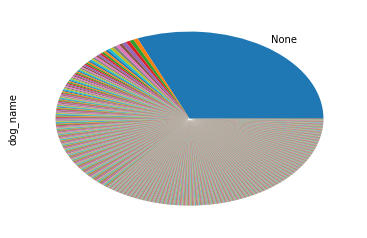

In [292]:
%matplotlib inline
import numpy as np
labels = np.full(len(dogratep_analys.dog_name.value_counts()), "", dtype=object)
labels[0] = 'None'
dogratep_analys.dog_name.value_counts().plot(kind="pie", labels=labels)

分析2. 分析source中tweet记录的来源。如下分析可见，2175条记录中有2042条记录是来自于Twitter for iphone,占到93.8%

在数据清理中，为这个分析做了如下工作：
* 将source中的url删除

In [301]:
TweetDeck_counts = dogratep_analys.source.value_counts()['TweetDeck']
Twitterforiphone_counts = dogratep_analys.source.value_counts()['Twitter for iPhone']
Twitterwebclient_counts = dogratep_analys.source.value_counts()['Twitter Web Client']

In [302]:
TweetDeck_counts

11

In [303]:
Twitterforiphone_counts

1955

In [304]:
Twitterwebclient_counts

28

In [307]:
Twitterforiphone_counts/(TweetDeck_counts+Twitterforiphone_counts+Twitterwebclient_counts)

0.98044132397191575

分析3. 分析dog_status中狗狗分类的统计

在数据清理中，为这个分析做了如下工作：
* 将狗狗地位的四列合并存入新的变量，并将原始列删除

In [308]:
doggo_counts = dogratep_analys.dog_status.value_counts()['doggo']
floofer_counts = dogratep_analys.dog_status.value_counts()['floofer']
pupper_counts = dogratep_analys.dog_status.value_counts()['pupper']
puppo_counts = dogratep_analys.dog_status.value_counts()['puppo']

In [309]:
doggo_counts

72

In [310]:
floofer_counts

3

In [311]:
pupper_counts

223

In [312]:
puppo_counts

28

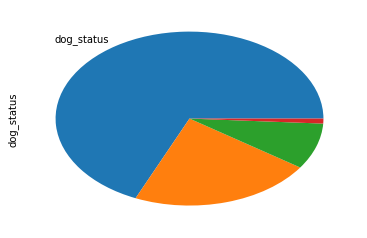

In [313]:
%matplotlib inline
import numpy as np
labels = np.full(len(dogratep_analys.dog_status.value_counts()), "", dtype=object)
labels[0] = 'dog_status'
dogratep_analys.dog_status.value_counts().plot(kind="pie", labels=labels)